# Task - I
### Author: **Allen Ben Philipose**

## Import Libraries

In [477]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

In [478]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  

In [479]:
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [480]:
allen = pd.read_csv("Dataset.csv")

In [481]:
allen.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [482]:
allen.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [483]:
allen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Exploratory Data Analysis

In [484]:
allen_corr = allen.corr()

In [485]:
allen_corr.style.background_gradient(cmap='coolwarm', axis=None)

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Plot - I

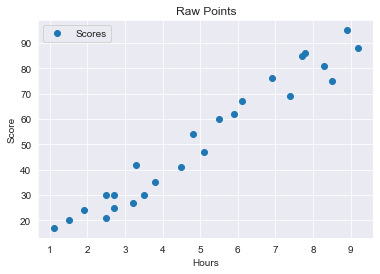

In [486]:
allen.plot(x='Hours', y='Scores', style='o')  
plt.title('Raw Points')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

## Train-test-split

In [487]:
x = allen.iloc[:,:-1].values  

In [488]:
y = allen.iloc[:,1].values  

In [489]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1,random_state=61)

## Model

In [490]:
model = LinearRegression()  
model.fit(xtrain, ytrain) 

LinearRegression()

## Plot - II

In [520]:
a = float(model.coef_[0])
print(a)

9.897625293386717


In [521]:
b = float(model.intercept_)
print(b)

1.7808780891895637


In [523]:
p = a*x+b

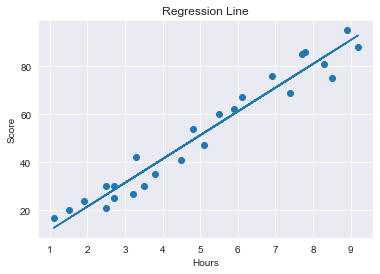

In [524]:
plt.scatter(x,y)
plt.plot(x,p)
plt.title('Regression Line')  
plt.xlabel('Hours')  
plt.ylabel('Score') 
plt.show()

## Metrics

In [525]:
pred = model.predict(xtest)

In [526]:
allen2 = pd.DataFrame({'Actual': ytest, 'Predicted': pred})  
allen2

,Actual,Predicted
0,81,83.931168
1,62,60.176867
2,24,20.586366


In [527]:
print("Mean Absolute Error: %.2f" % metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error: 2.72


In [528]:
print("Mean Squared Error: %.2f" % metrics.mean_squared_error(ytest,pred))

Mean Squared Error: 7.86


In [529]:
print("Root Mean Squared Error: %.2f" % pow(metrics.mean_squared_error(ytest,pred),1/2))

Root Mean Squared Error: 2.80


## Prediction

In [530]:
user_input = float(input())
user = np.array([user_input]).reshape(1,-1)

In [531]:
prediction = model.predict(user)

In [532]:
print("No. of Hours: {}".format(user_input))

No. of Hours: 9.0


In [533]:
print("Predicted Score: %.2f" % prediction[0])

Predicted Score: 90.86


## Cross-verification

In [545]:
cross = (a*user_input)+b

In [547]:
print("Cross Verified Score: %.2f" % cross)

Cross Verified Score: 90.86
